In [1]:
import pandas as pd
import numpy as np

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [11]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
train_data = pd.read_csv('kc_house_train_data.csv', dtype = dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype = dtype_dict)

In [7]:
def get_numpy_data(data_frame, features, output):
    data_frame['constant'] = 1
    features = ['constant'] + features
    
    features_frame = data_frame[features]
    
    features_matrix = features_frame.values
    output_array = data_frame[output].values
    
    return features_matrix, output_array

In [9]:
def predict_output(features_matrix, weights):
    return features_matrix.dot(np.transpose(weights))

In [16]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):   
    derivative = errors.dot(feature) * 2 
    if not feature_is_constant:
        derivative += 2 * l2_penalty * weight
    return derivative

In [17]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0


In [30]:
def ridge_regression_gradient_descent(features_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    converged = False
    weights = np.array(initial_weights)
    
    it = 0
    while it < max_iterations:
        predictions = features_matrix.dot(weights)
        errors = predictions - output
               
        for i in range(len(weights)):
            feature = features_matrix[:, i]
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature, weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature, weights[i], l2_penalty, False)
            weights[i] = weights[i] - step_size * derivative
            
        it += 1
    return weights

In [19]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [35]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, [0.0, 0.0], 1e-12, 0.0, 1000)
print simple_weights_0_penalty

[ -1.63113515e-01   2.63024369e+02]


In [37]:
simple_weights_11_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, [0.0, 0.0], 1e-12, 1e11, 1000)
simple_weights_11_penalty

array([   9.76730382,  124.57217567])

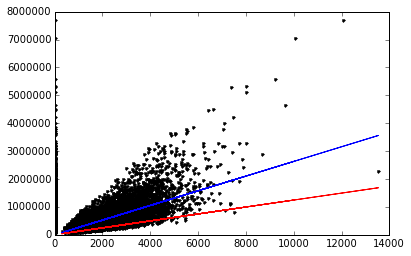

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_11_penalty),'r-')

In [34]:
print simple_weights_0_penalty
print simple_weights_11_penalty

[ -1.63113515e-01   2.63024369e+02]
[ nan  nan]


In [64]:
print sum((predict_output(simple_test_feature_matrix, np.array([0., 0.])) - test_output) ** 2)
print sum((predict_output(simple_test_feature_matrix, np.array(
[ -1.63113515e-01, 2.63024369e+02])) - test_output) ** 2)
print sum((predict_output(simple_test_feature_matrix, np.array(
[ 9.76730382,  124.57217567])) - test_output) ** 2)

1.78427328614e+15
2.75723632153e+14
6.94642101515e+14


In [55]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [56]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, [0.0, 0.0, 0.0], 1e-12, 0.0, 1000)
print multiple_weights_0_penalty

[  -0.35743483  243.05416982   22.41481497]


In [57]:
multiple_weights_11_penalty = ridge_regression_gradient_descent(feature_matrix, output, [0.0, 0.0, 0.0], 1e-12, 1e11, 1000)
print multiple_weights_11_penalty

[  6.74296579  91.48927365  78.43658766]


In [62]:
print predict_output(simple_feature_matrix, simple_weights_0_penalty)[0]

310368.592266


In [63]:
print predict_output(simple_feature_matrix, simple_weights_11_penalty)[0]

147004.934599


In [65]:
print sum((predict_output(test_feature_matrix, np.array([0., 0., 0.])) - test_output) ** 2)

1.78427328614e+15


In [60]:
print test_data

              id             date    price  bedrooms  bathrooms  sqft_living  \
0     0114101516  20140528T000000   310000         3       1.00         1430   
1     9297300055  20150124T000000   650000         4       3.00         2950   
2     1202000200  20141103T000000   233000         3       2.00         1710   
3     8562750320  20141110T000000   580500         3       2.50         2320   
4     7589200193  20141110T000000   535000         3       1.00         1090   
5     2078500320  20140620T000000   605000         4       2.50         2620   
6     7766200013  20140811T000000   775000         4       2.25         4220   
7     9478500640  20140819T000000   292500         4       2.50         2250   
8     9558200045  20140828T000000   289000         3       1.75         1260   
9     8820901275  20140610T000000   571000         4       2.00         2750   
10    3444100400  20150316T000000   349000         3       1.75         1790   
11    7437100340  20141222T000000   3600